# Optimise pruning parameters

This Notebook shows how to optimise the pruning parameters of your network based on pairwise connectivity data.

First we need to create a small network that we can use for the optimisation of the pruning parameters.

In this example we do not need to have realistic neuron densities, so we will place the neurons in a cube of diameter 150 micrometers.

In [1]:
import os
import numpy as np

n_neurons = 150

# pop_size = 10
# epochs = 10

pre_type = "iSPN"
post_type = "iSPN"
con_type = "GABA"

num_params = 1
distance_dependent_pruning = False


SPN2SPNdistDepPruning = "1-exp(-(0.4*d/60e-6)**2)"
FS_dist_dep_pruning = "exp(-(0.5*d/60e-6)**2)" 


extra_pruning_parameters = { }

if distance_dependent_pruning:
    if pre_type == "FS" and (post_type == "dSPN" or post_type == "iSPN"):
        extra_pruning_parameters = { 'distPruning': FS_dist_dep_pruning }
    elif "SPN" in pre_type and "SPN" in post_type:
        extra_pruning_parameters = { 'distPruning': SPN2SPNdistDepPruning }
    else:
        # No distance dependent pruning available for this neuron type, set it to False
        distance_dependent_pruning = False
        
dd_str = "_dd" if distance_dependent_pruning else ""
network_path = os.path.join("networks", f"{pre_type}_to_{post_type}_np{num_params}{dd_str}")

        
all_experimental_data = {}
all_experimental_data["dSPN", "iSPN"] = [(0, 50e-6, 3/47.0), (0, 100e-6, 3/66.0)]
all_experimental_data["dSPN", "dSPN"] = [(0, 50e-6, 5/19.0), (0, 100e-6, 3/43.0)]
all_experimental_data["iSPN", "iSPN"] = [(0, 50e-6, 14/39.0), (0, 100e-6, 7/31.0)]
all_experimental_data["iSPN", "dSPN"] = [(0, 50e-6, 13/47.0), (0, 100e-6, 10/80.0)]
all_experimental_data["FS", "FS"] = [(0, 250e-6, 7/12.0)]
all_experimental_data["FS", "iSPN"] = [(0, 100e-6, 6/9.0), (0, 150e-6, 21/54.0), (0, 250e-6, 27/77.0)]
all_experimental_data["FS", "dSPN"] = [(0, 100e-6, 8/9.0), (0, 150e-6, 29/48.0), (0, 250e-6, 48/90.0)]

experimental_data = all_experimental_data[pre_type, post_type]

cube_side = 1.5*np.max([x[1] for x in experimental_data])

avg_num_synapses_per_pair = 3  # Expected mean, error weight

In [2]:
from snudda.place.create_cube_mesh import create_cube_mesh

mesh_file = os.path.join(network_path, "cube-mesh.obj")
create_cube_mesh(mesh_file, [0,0,0], cube_side)

from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123, snudda_data="../../../../BasalGangliaData/data/")

si.define_structure(struct_name="Cube", struct_mesh=mesh_file, d_min=12e-6, mesh_bin_width=25e-6)

if pre_type == post_type:
    si.add_neurons(name=pre_type, num_neurons=n_neurons, volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
else:
    si.add_neurons(name=pre_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
    si.add_neurons(name=post_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum","dspn"))
    

# The parameters here does not matter, they will be set during optimisation
si.add_neuron_target(neuron_name=pre_type,
                     target_name=post_type,
                     connection_type=con_type,
                     dist_pruning=SPN2SPNdistDepPruning,
                     f1=None, soft_max=None, mu2=None,
                     a3=None,
                     conductance=[0.24e-9, 0.1e-9],
                     mod_file="tmGabaA")

si.write_json()

Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Writing networks/iSPN_to_iSPN_np1/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/iSPN_to_iSPN_np1/network-config.json


Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/iSPN_to_iSPN_np1/network-config.json


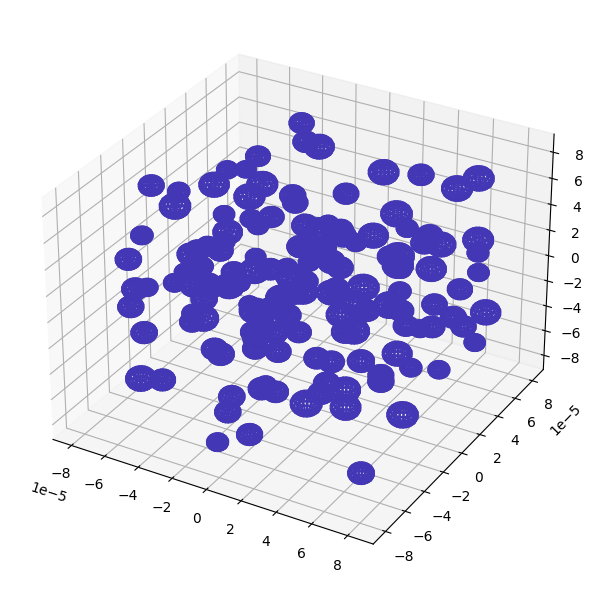

In [4]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)
pn.close() 

In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, hyper_voxel_size=100)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/iSPN_to_iSPN_np1/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 56/125 (150 neurons)
Processing hyper voxel : 31/125 (149 neurons)
Processing hyper voxel : 36/125 (131 neurons)
Processing hyper voxel : 61/125 (129 neurons)
Processing hyper voxel : 57/125 (125 neurons)
Processing hyper voxel : 32/125 (115 neurons)
Processing hyper voxel : 55/125 (89 neurons)
Processing hyper voxel : 30/125 (79 neurons)
Processing hyper voxel : 51/125 (76 neurons)
Processing hyper voxel : 26/125 (73 neurons)
Processing hyper voxel : 62/125 (70 neurons)
Processing hyper voxel : 37/125 (55 neurons)
Processing hyper voxel : 60/125 (51 neurons)
Processing hyper voxel : 35/125 (41 neurons)
Processing hyper voxel : 81/125 (38 neurons)
Processing hyper voxel : 52/125 (31 neurons)
Processing hyper voxel : 27/125 (29 neurons)
Processing hyper voxel : 50/125 (17 neurons)
Processing hyper vox

In [6]:
from snudda.optimise.optimise_pruning import OptimisePruning
op = OptimisePruning(network_path=network_path)

In [7]:
op.merge_putative_synapses(force_merge=True)

Read 291901 out of total 291901 synapses


In [8]:
op.prune.connectivity_distributions

{(1,
  1,
  10): (OrderedDict([('f1', 1.0),
               ('softMax', None),
               ('mu2', None),
               ('a3', None),
               ('distPruning', '1-exp(-(0.4*d/60e-6)**2)'),
               ('cluster', False)]), None)}

In [9]:
op.prune.type_id_lookup

{'iSPN': 1}

In [10]:
op.prune.hist_file["meta/connectivityDistributions"][()]

b'{"iSPN$$iSPN": {"GABA": {"conductance": [2.4e-10, 1e-10], "channelParameters": {"modFile": "tmGabaA"}, "clusterSize": 1, "clusterSpread": null, "pruning": {"f1": null, "softMax": null, "mu2": null, "a3": null, "distPruning": "1-exp(-(0.4*d/60e-6)**2)", "cluster": false}, "channelModelID": 10, "lognormal_mu_sigma": [-22.230424900260093, 0.40010675493807013]}}}'

In [11]:
res = op.optimize(pre_type=pre_type, post_type=post_type, con_type=con_type, 
                  experimental_data=experimental_data, 
                  avg_num_synapses_per_pair=avg_num_synapses_per_pair,
                  extra_pruning_parameters=extra_pruning_parameters, 
                  workers=8, maxiter=1000, tol=0.00001, num_params=num_params)

/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py:377: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


Duration: 79.77928738800256 s


# Best parameter set

In [12]:
if num_params == 1:
    param_str = f"f1 = %f" % (res.x[0])
elif num_params == 2:
    param_str = f"f1 = %f, mu2 = %f" % (res.x[0], res.x[1])
elif num_params == 3:
    param_str = f"f1 = %f, mu2 = %f, a3 = %f" % (res.x[0], res.x[1], res.x[2])
elif num_params == 4:
    param_str = f"f1 = %f, softMax = %f, mu2 = %f, a3 = %f" % (res.x[0], res.x[1], res.x[2], res.x[3])
else:
    param_str = res.x
    
if "distPruning" in extra_pruning_parameters:
   param_str += f" ({distPruning})"                                                  
                                                 
print(param_str)

f1 = 0.022481


In [13]:
res

     fun: 8.961628321693285
 message: 'Optimization terminated successfully.'
    nfev: 542
     nit: 35
 success: True
       x: array([0.02248082])

In [14]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
import glob

# Get the last file
# list_of_files = glob.glob(os.path.join(network_path, "temp", "network-synapses-*hdf5"))
# network_file = max(list_of_files, key=os.path.getctime)

network_file = os.path.join(network_path, "network-synapses.hdf5")

dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 150
Synapse row 0 - 0.0 % time: 0.0007585999992443249 seconds
Created connection matrix 0.011720326998329256 seconds
Created gap junction connection matrix 9.887199848890305e-05 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 6552, at 0
Created distance histogram (optimised) in 0.005678898996848147 seconds
Saving cache to networks/iSPN_to_iSPN_np1/network-synapses.hdf5-cache


Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 150/150
Counting connections
Requested: 10000000.0 calculated [22350.]
P(d<5e-05) = 0.36213434452871074
P(d<0.0001) = 0.2738443906787215


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1394: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


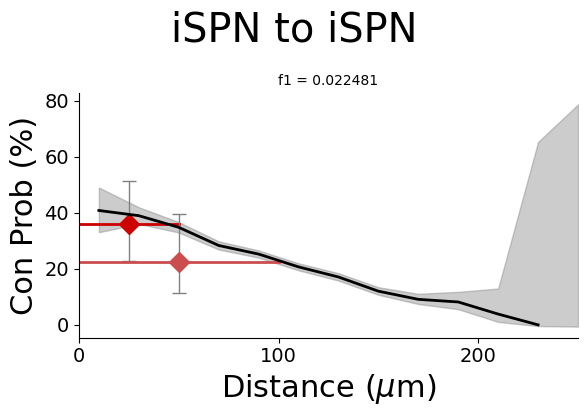

Wrote networks/iSPN_to_iSPN_np1/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.pdf
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 150/150
Calculating max synapses
Calculating mean synapses
Plotting 5213 connections


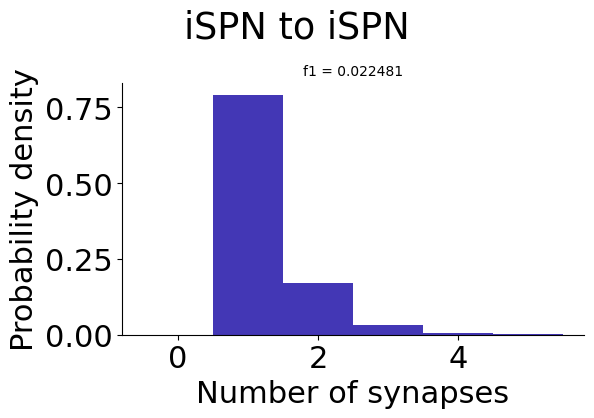

Wrote networks/iSPN_to_iSPN_np1/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.pdf


In [15]:
if pre_type == "dSPN" and post_type == "iSPN":
    sa.plot_connection_probability("dSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(3, 47), (3, 66)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("dSPN", "iSPN", sub_title=param_str)
elif pre_type == "dSPN" and post_type == "dSPN":
    sa.plot_connection_probability("dSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(5, 19), (3, 43)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("dSPN", "dSPN", sub_title=param_str)
elif pre_type == "iSPN" and post_type == "iSPN":
    sa.plot_connection_probability("iSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(14, 39), (7, 31)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("iSPN", "iSPN", sub_title=param_str)
elif pre_type == "iSPN" and post_type == "dSPN":
    sa.plot_connection_probability("iSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(13, 47), (10, 80)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("iSPN", "dSPN", sub_title=param_str)
elif pre_type == "FS" and post_type == "FS":
    sa.plot_connection_probability("FS", "FS", dist_3d=True, exp_max_dist=[250e-6], exp_data_detailed=[(7, 12)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("FS", "FS", sub_title=param_str)
elif pre_type == "FS" and post_type == "iSPN":
    sa.plot_connection_probability("FS", "iSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(6, 9), (21, 54), (27,77)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("FS", "iSPN", sub_title=param_str)
elif pre_type == "FS" and post_type == "dSPN":
    sa.plot_connection_probability("FS", "dSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(8, 9), (29, 48), (48,90)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("FS", "dSPN", sub_title=param_str)